Universidad Galileo  
Maestría en Data Science  
Statistical Learning II
Sección U  


   # **Tarea Practica 3: Reducción de dimensionalidad**


<p style="text-align: right;">
Henry Giovanni<br/>
Barrientos García<br/>
21001538<br/>
Guatemala, 02 de agosto de 2021<br/>
</p>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [13]:
dataset = pd.read_csv("estaturas.xlsx - normales.csv")
df = pd.DataFrame(dataset)
x = df["Estatura(metros)"]
y = df["Edad(años)"]

x1 = df["Estatura(metros)"]
y1 = df["Edad(años)"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train = x_train.values.reshape([x_train.values.shape[0], 1])
x_test = x_test.values.reshape([x_test.values.shape[0], 1])

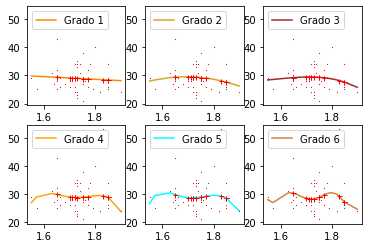

In [15]:
colors = ["limegreen", "darkorange", "goldenrod", "brown", "orange", "aqua", "peru", "navy", "royalblue", "turquoise", "cadetblue"]

for i in range(1,7):
    poly_features = PolynomialFeatures(degree=i)
    x_poly = poly_features.fit_transform(x_train)
    xt_poly = poly_features.fit_transform(x_test)
    poly_model = LinearRegression()
    poly_model.fit(x_poly, y_train)
    pred = poly_model.predict(x_poly)
    pred2 = poly_model.predict(xt_poly)
    xt, yt = zip(*sorted(zip(x_test, pred2)))
    x, y  =  zip(*sorted(zip(x_train, pred)))
    plt.subplot(2, 3, i)
    plt.plot(x, y, "-", color=colors[i], label="Grado "+str(i), markersize=2)
    plt.plot(xt, yt, "+", color="r", markersize=5)
    plt.plot(x1, y1, "*", color="crimson", markersize=.5)
    plt.legend(loc=2)
plt.show()